<strong><b><font size="5">Transformações em Séries Temporais - Log, Raiz Quadrada e Box-Cox</font></b></strong>

Todas as aulas deste curso podem ser encontradas na timeline da Comunidade em nosso portal: www.datascienceacademy.com.br

Uma suposição comum em muitas técnicas de séries temporais é que os dados sejam estacionários.
Um processo estacionário tem a propriedade de que a média, variância e estrutura de autocorrelação não mudam no decorrer do tempo. 

Estacionariedade pode ser definida em termos matemáticos precisos, mas para os nossos propósitos queremos dizer uma série parecida com um plano liso, sem tendência, variância constante no decorrer do tempo, um estrutura de autocorrelação constante no decorrer do tempo e nenhuma flutuação periódica (sazonalidadae).

Há duas razões principais por trás da não estacionariedade de uma série temporal:

1. **Tendência** - Média variável ao longo do tempo. Em nosso exemplo, vimos que, em média, o número de passageiros estava crescendo ao longo do tempo.

2. **Sazonalidade** - Variações em prazos específicos. Por exemplo, as pessoas podem tender a comprar carros em um determinado mês por causa de uma renda extra ou evento (como férias).

### Tipos de Estacionariedade

Vamos entender os diferentes tipos de estacionaridades.

**Estacionaridade Estrita**: Uma série estacionária estrita satisfaz a definição matemática de um processo estacionário. Para uma série estacionária estrita, a média, variância e covariância não são funções do tempo. O objetivo é converter uma série não estacionária em uma série estacionária estrita para fazer previsões.

**Estacionaridade de Tendência**: Uma série que não possui raiz unitária, mas exibe uma tendência, é chamada de série estacionária de tendência. Uma vez removida a tendência, a série resultante será estritamente estacionária. O teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin) classifica uma série como estacionária na ausência de raiz da unidade. Isso significa que a série pode ser estacionária estrita ou estacionária de tendência.

**Estacionaridade Diferencial**: Uma série temporal que pode ser tornada estritamente estacionária pela diferenciação é do tipo estacionária diferencial. O teste ADF (Augmented Dickey Fuller) também é conhecido como teste de estacionariedade diferencial.

É sempre melhor aplicar os dois testes, para ter certeza de que a série é realmente estacionária.

### E se a série não for estacionária?

Se a série temporal não for estacionária, podemos frequentemente transformá-la em estacionária com uma das técnicas seguintes (ou combinações delas).

1- Transformações de potência. Aplicamos uma transformação matemática aos dados visando remover padrões e transformar a série em estacionária. As transformações de potência mais comuns são a de log, raiz quadrada e Box-Cox.

2- Podemos diferenciar os dados. Isto é, dada a série Yt, criamos a nova série: Y(i) = Y(i) - Y(i-1)

Os dados diferenciados conterão um ponto a menos que os dados originais. Embora você possa diferenciar os dados mais que uma vez, uma diferenciação é geralmente suficiente.

3- Se os dados tiverem uma tendência, podemos ajustar algum tipo de curva aos dados e depois então modelar os resíduos daquele ajuste. Desde que o propósito do ajuste é simplesmente remover tendências de longo prazo, um ajuste simples, tal como uma linha reta, é tipicamente usado.

4- Para dados negativos, você pode adicionar uma constante adequada para tornar todos os dados positivos antes de aplicar a transformação. Esta constante pode então ser subtraída do modelo para obter valores previstos (i.e., ajustados) e previsões para pontos futuros.

As técnicas acima são dirigidas para gerarem séries com localizações e escala constantes. 

Agora que estamos familiarizados com o conceito de estacionariedade e seus diferentes tipos, podemos finalmente estudar como transformar nossa série em estacionária. Estudaremos esse tópico durante algumas aulas.

Lembre-se de que, para usar os modelos de previsão de séries temporais, é necessário converter primeiro as séries não estacionárias em séries estacionárias.

### Carregando e Preparando os Dados

Vamos carregar os dados e prepará-los para mais uma rodada de análise.

In [10]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [11]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [12]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise de dados
import scipy
from scipy.stats import boxcox

Vamos carregar um dataset com uma série temporal.

O dataset é público e pode ser encontrado aqui:

https://www.kaggle.com/rakannimer/air-passengers

O conjunto de dados AirPassenger fornece totais mensais de passageiros de uma companhia aérea dos EUA, de 1949 a 1960. Esse conjunto de dados já é de uma classe de série temporal, portanto, nenhuma manipulação adicional de classe ou data é necessária.

In [13]:
# Carrega os dados
# Observe que estamos carregando os dados e já definindo a data como índice com o parâmetro index_col = 0
dados = pd.read_csv('https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset1.csv', 
                    header = None, 
                    index_col = 0,
                    names = ['Passageiros'])

In [14]:
# Série
dados.head()

,Passageiros
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


### Principais Técnicas Para Aplicar Estacionaridade:

**Transformação**

- Transformação de log
- Transformação exponencial
- Transformação Box Cox
- Transformação da raiz quadrada

**Remoção de Tendência**

- Smoothing (alisamento ou suavização) é usada para remover a tendência da série, calculando médias contínuas ao longo das janelas de tempo.

Mas as técnicas acima não funcionam em todos os casos, principalmente nos de alta sazonalidade. Para esses casos, outras técnicas podem ser usadas:

**Diferenciação**

- Nesta técnica, calculamos a diferença da observação em um determinado instante com a do instante anterior.

**Decomposição**

- Nesta abordagem (que vimos em uma das aulas anteriores e voltaremos a estudar), a tendência e a sazonalidade são modeladas separadamente e a parte restante da série é retornada.

Vamos estudandos as técnicas de forma intercambiável, pois elas são melhores usadas quando aplicadas em conjunto.

### Plot da Série Temporal

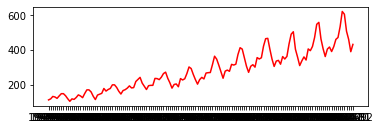

In [15]:
# Área de plotagem
plt.figure(1)

# Gráfico de Linha
plt.subplot(211)
plt.plot(dados['Passageiros'], color = "red")

(array([24., 27., 19., 18., 22., 13., 10.,  6.,  3.,  2.]),
 array([104. , 155.8, 207.6, 259.4, 311.2, 363. , 414.8, 466.6, 518.4,
        570.2, 622. ]),
 <BarContainer object of 10 artists>)

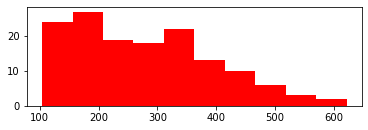

In [16]:
# Histograma
plt.subplot(211)
plt.hist(dados['Passageiros'], color = "red")

In [17]:
# Média da série
dados['Passageiros'].mean()

280.2986111111111

In [18]:
# Desvio Padrão da série
dados['Passageiros'].std()

119.96631694294321

O conjunto de dados é não estacionário, o que significa que a média e a variância das observações mudam ao longo do tempo. Isso dificulta a modelagem por métodos estatísticos clássicos, como ARIMA, e métodos mais sofisticados de aprendizado de máquina, como redes neurais.

Isso é causado pelo que parece ser uma tendência crescente e um componente de sazonalidade.

Além disso, a quantidade de alteração ou a variância está aumentando com o tempo. Isso fica claro quando você olha para o tamanho do componente sazonal e percebe que de há um ciclo para o próximo, a amplitude (de baixo para cima do ciclo) está aumentando.

### Transformações

As transformações são usadas para estabilizar a variação não constante de uma série. Métodos de transformação comuns incluem transformação de log, raiz quadrada e transformação Box-Cox. Vamos começar pela transformação de log em nosso conjunto de dados de passageiros aéreos.

#### Transformação de Log

Séries temporais com uma distribuição exponencial podem ser linearizadas usando o logaritmo dos valores. Isso é chamado de transformação de log. Você com certeza lembra do que é logaritmo pois estudou isso no ensino fundamental. :-)

As transformações de log são populares em dados de séries temporais, pois são eficazes na remoção da variação exponencial.

É importante observar que esta operação assume que os valores são positivos e diferentes de zero. É comum transformar observações adicionando uma constante fixa para garantir que todos os valores de entrada atendam a esse requisito. Por exemplo: serie_transformada_y = log(constante + x)

In [19]:
# Vamos aplicar uma transformação de log usando np.log() e gravamos o resultado em uma nova coluna do nosso dataset
dados['Passageiros_log'] = np.log(dados['Passageiros'])
dados.head()

,Passageiros,Passageiros_log
1949-01,112,4.718499
1949-02,118,4.770685
1949-03,132,4.882802
1949-04,129,4.859812
1949-05,121,4.795791


In [29]:
dados.shape

(144, 3)

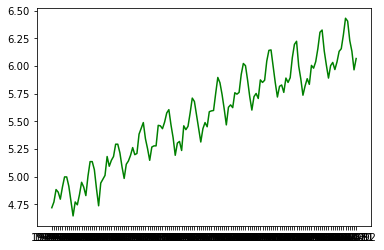

In [20]:
# Plot da série transformada
plt.plot(dados['Passageiros_log'], color = "green")

(array([ 8., 14., 11., 20., 16., 15., 27., 17., 11.,  5.]),
 array([4.6443909 , 4.82324582, 5.00210074, 5.18095566, 5.35981058,
        5.5386655 , 5.71752042, 5.89637533, 6.07523025, 6.25408517,
        6.43294009]),
 <BarContainer object of 10 artists>)

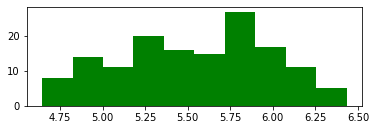

In [21]:
# Histograma da série transformada
plt.subplot(211)
plt.hist(dados['Passageiros_log'], color = "green")

A execução do exemplo resulta em uma tendência que parece mais linear. O gráfico de linha mostra um crescimento e variação aparentemente lineares.

O histograma também mostra uma distribuição de observações do tipo gaussiana mais uniforme.

In [22]:
# Média da série
dados['Passageiros_log'].mean()

5.542175958531869

In [23]:
# Desvio Padrão da série
dados['Passageiros_log'].std()

0.441456424219546

Observe que mudamos a escala dos dados. Agora, aplicamos a Diferenciação para ver o resultado da transformação.

In [24]:
# Aplicando Diferenciação - Y(i) = Y(i) - Y(i-1)
# Gravamos a série diferenciada no próprio dataset
dados['Passageiros_log_diff'] = dados['Passageiros_log'] - dados['Passageiros_log'].shift(1)
dados.head()

,Passageiros,Passageiros_log,Passageiros_log_diff
1949-01,112,4.718499,NaN
1949-02,118,4.770685,0.052186
1949-03,132,4.882802,0.112117
1949-04,129,4.859812,-0.022990
1949-05,121,4.795791,-0.064022


(array([ 2., 13., 18., 13., 15., 26., 13., 24., 15.,  4.]),
 array([-0.22314355, -0.17851484, -0.13388613, -0.08925742, -0.04462871,
         0.        ,  0.04462871,  0.08925742,  0.13388613,  0.17851484,
         0.22314355]),
 <BarContainer object of 10 artists>)

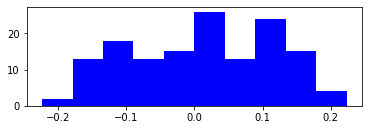

In [25]:
# Histograma da série diferenciada
plt.subplot(211)
plt.hist(dados['Passageiros_log_diff'], color = "blue")

In [26]:
# Média da série
dados['Passageiros_log_diff'].mean()

0.009440046971671445

In [27]:
# Desvio Padrão da série
dados['Passageiros_log_diff'].std()

0.10655614752984616

<AxesSubplot:>

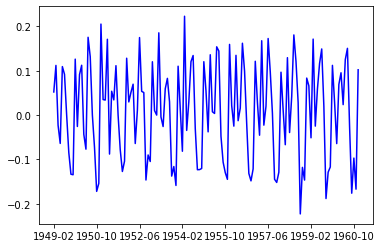

In [28]:
# Perceba que gerou um valor NA
# Isso é normal, pois ao aplicar a Diferenciação perdemos um ponto de dado
# Precisamos tomar cuidado ao criar o plot, removendo o valor NA
dados['Passageiros_log_diff'].dropna().plot(color = "blue")

Como você pode ver, esse gráfico é uma melhoria significativa em relação aos gráficos anteriores. 

Ao aplicar transformações, você consegue representar na série apenas o que realmente importa para suas análises: os dados, neste caso, o número de passageiros ao longo do tempo.

#### Transformação de Raiz Quadrada

Uma série temporal que tem uma tendência quadrática de crescimento pode ser linearizada calculando sua raiz quadrada.

É possível que o conjunto de dados de passageiros de companhias aéreas mostre um crescimento quadrático. Se esse for o caso, poderíamos esperar que uma transformação de raiz quadrada para reduzir a tendência de crescimento seja linear e alterar a distribuição de observações para talvez ser quase gaussiana.

O exemplo abaixo executa uma raiz quadrada do conjunto de dados e plota os resultados.

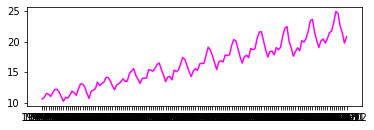

In [30]:
# Transformação de Raiz Quadrada com np.sqrt()
dados_sqrt = np.sqrt(dados['Passageiros'])

# Gráfico de Linha
plt.subplot(211)
plt.plot(dados_sqrt, color = "magenta")

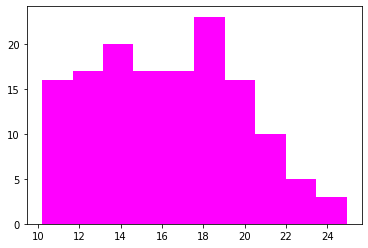

In [31]:
# Histograma
plt.hist(dados_sqrt, color = "magenta")
plt.show()

Podemos ver que a tendência foi reduzida, mas não foi removida.

O gráfico de linha ainda mostra uma variação crescente de ciclo para ciclo. E o histograma ainda mostra uma cauda longa à direita da distribuição, sugerindo uma distribuição exponencial ou de cauda longa.

#### Transformação Box-Cox

A transformação de raiz quadrada e a transformação de log pertencem a uma classe de transformações denominadas transformações de potência.

A transformação Box-Cox é um método de transformação de dados configurável que suporta a raiz quadrada e a transformação de log, bem como um conjunto de transformações relacionadas.

Mais do que isso, pode ser configurado para avaliar um conjunto de transformações automaticamente e selecionar o melhor ajuste. Pode ser pensado como uma ferramenta elétrica para resolver mudanças baseadas em energia em suas séries temporais. A série resultante pode ser mais linear e a distribuição resultante mais gaussiana ou uniforme, dependendo do processo que a gerou.

A biblioteca scipy.stats fornece uma implementação da transformação Box-Cox. A função boxcox() usa um argumento, chamado lambda, que controla o tipo de transformação a ser executada.

Abaixo estão alguns valores comuns para lambda

- lambda = -1. é uma transformação recíproca.
- lambda = -0,5 é uma transformação de raiz quadrada recíproca.
- lambda = 0,0 é uma transformação de log.
- lambda = 0,5 é uma transformação de raiz quadrada.
- lambda = 1.0 não é transformação.

Vamos ao exemplo:

In [32]:
# Aplicando Transformação Box-Cox
dados['Passageiros_box'] = boxcox(dados['Passageiros'], lmbda = 0.0)
dados.head()

,Passageiros,Passageiros_log,Passageiros_log_diff,Passageiros_box
1949-01,112,4.718499,NaN,4.718499
1949-02,118,4.770685,0.052186,4.770685
1949-03,132,4.882802,0.112117,4.882802
1949-04,129,4.859812,-0.022990,4.859812
1949-05,121,4.795791,-0.064022,4.795791


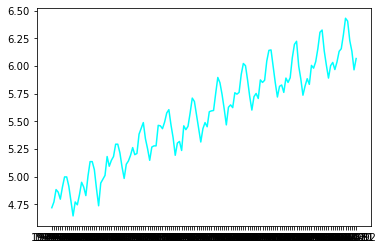

In [33]:
# Plot da série transformada
plt.plot(dados['Passageiros_box'], color = "cyan")

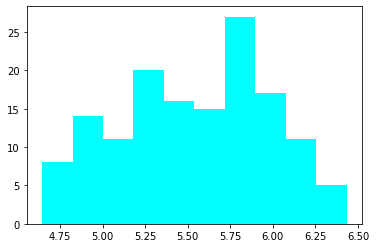

In [34]:
# Histograma
plt.hist(dados['Passageiros_box'], color = "cyan")
plt.show()

Podemos definir o parâmetro lambda como None (o padrão) e deixar a função encontrar um valor ajustado estatisticamente.

O exemplo a seguir demonstra esse uso, retornando o conjunto de dados transformado e o valor lambda escolhido.

In [35]:
# Aplicando Transformação Box-Cox
dados['Passageiros_box2'], lam_value = boxcox(dados['Passageiros'])
print('Valor Ideal de Lambda: %f' % lam_value)
dados.head()

Valor Ideal de Lambda: 0.148023


,Passageiros,Passageiros_log,Passageiros_log_diff,Passageiros_box,Passageiros_box2
1949-01,112,4.718499,NaN,4.718499,6.827490
1949-02,118,4.770685,0.052186,4.770685,6.932822
1949-03,132,4.882802,0.112117,4.882802,7.161892
1949-04,129,4.859812,-0.022990,4.859812,7.114611
1949-05,121,4.795791,-0.064022,4.795791,6.983787


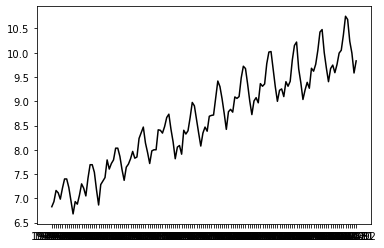

In [36]:
# Plot da série transformada
plt.plot(dados['Passageiros_box2'], color = "black")

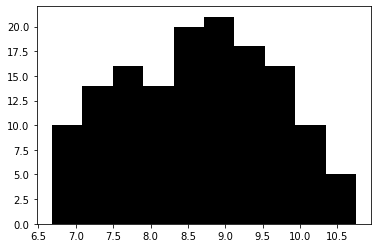

In [37]:
# Histograma
plt.hist(dados['Passageiros_box2'], color = "black")
plt.show()

A execução do exemplo gerou o valor lambda de 0,148.

Podemos ver que isso está muito próximo de um valor lambda de 0,0, resultando em uma transformação de log mais forte (e menor que) que 0.5 para a transformação de raiz quadrada.